In [14]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# url = "https://en.wikipedia.org/wiki/Climate_of_California"
# email = "imick5555@gmail.com"
# ua = f"STAT386-class-scraper/1.0 (+{email})"
# r = requests.get(url, headers={"User-Agent": ua, "From": email}, timeout=15)
url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW'
r = requests.get(url)
print(r.text)

<!doctype html><html class="a-no-js" data-19ax5a9jf="dingo"><head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!=

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')
print(soup.head())


[<script>var aPageStart = (new Date()).getTime();</script>, <meta charset="utf-8"/>, <script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>, <script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ecf++;b.pageURL=""+(e.location?e

In [5]:
table = soup.find("table", class_="mojo-body-table")
movies = []

var_finders = table.find_all("tr")[1:] if table else []
# The following lines down to movies.append(row) gets the data from the list in boxofficemojo.com for the top 200 highest grossing movies
# including the Rank, Title, money grossed, and year released
for var_finder in var_finders:
    row = {}
    rank_tag = var_finder.find("td",class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank")
    if rank_tag:
        row["rank"] = rank_tag.get_text(strip=True)
    title_tag = var_finder.find("td",class_="a-text-left mojo-field-type-title")
    if title_tag:
        row["title"] = title_tag.get_text(strip=True)
    money_tag = var_finder.find("td",class_="a-text-right mojo-field-type-money")
    if money_tag:
        row["gross_earnings"] = money_tag.get_text(strip=True)
    year_tag = var_finder.find("td",class_="a-text-left mojo-field-type-year")
    if year_tag:
        row["year"] = year_tag.get_text(strip=True)
    movies.append(row)
# this code underneath gets the mpaa rating from the website, using the link given for each movie title
# allowing us to extract the mpaa rating from the page that link takes us to
    link_tag = var_finder.find("a", class_="a-link-normal")  
    detail_url = None

    if link_tag and link_tag.get("href"):
        rating_url = "https://www.boxofficemojo.com" + link_tag["href"]
        rating = None
        if rating_url:
            rate = requests.get(rating_url)
            soup2 = BeautifulSoup(rate.text, "html.parser")
            rating_iden = soup2.find("div",class_="a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile")
            if rating_iden:
                divs = rating_iden.find_all("div",class_="a-section a-spacing-none")
                for div in divs:
                    span = div.find_all("span")
                    if len(span) >= 2 and span[0].get_text(strip=True) == "MPAA":
                        mpaa_rating = span[1].get_text(strip=True)
                        break
        row["rating"] = mpaa_rating


df = pd.DataFrame(movies)
print(df)





    rank                          title  gross_earnings  year rating
0      1                         Avatar  $2,923,710,708  2009  PG-13
1      2              Avengers: Endgame  $2,799,439,100  2019  PG-13
2      3       Avatar: The Way of Water  $2,343,096,253  2022  PG-13
3      4                        Titanic  $2,264,812,968  1997  PG-13
4      5                       Ne Zha 2  $2,150,000,000  2025  PG-13
..   ...                            ...             ...   ...    ...
195  196      The Passion of the Christ    $610,063,438  2004      R
196  197                     Life of Pi    $609,016,565  2012     PG
197  198               Ready Player One    $607,874,422  2018  PG-13
198  199  Transformers: The Last Knight    $605,425,157  2017  PG-13
199  200    Madagascar: Escape 2 Africa    $603,900,354  2008     PG

[200 rows x 5 columns]


<Axes: xlabel='rating'>

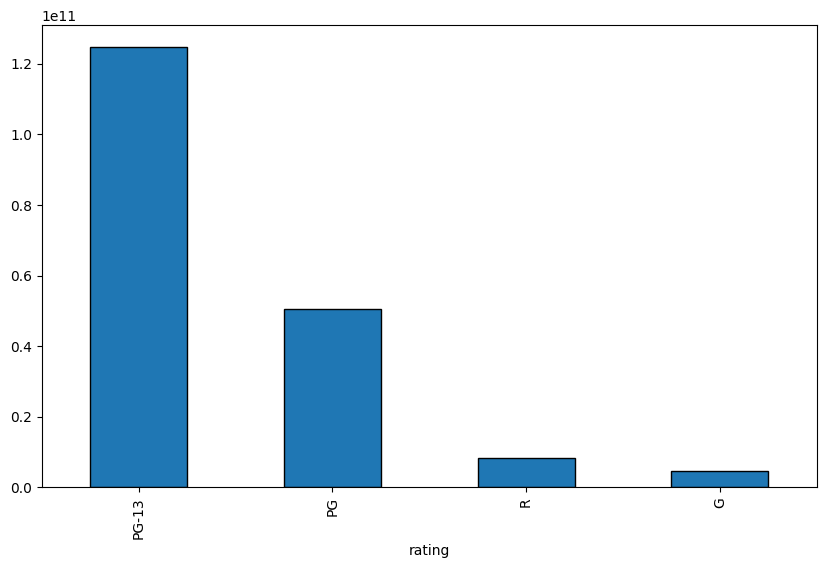

In [19]:
df["gross_earnings_num"] = (df["gross_earnings"].str.replace("[$,]", "", regex=True).astype(float))
earnings_rating = (df.groupby("rating")["gross_earnings_num"].sum().sort_values(ascending=False))
plt.figure(figsize=(10, 6))
earnings_rating.plot(kind="bar", color="#1f77b4", edgecolor="black")



In [18]:
earnings_rating = (df.groupby("rating")["gross_earnings_num"].mean().sort_values(ascending=False))
earnings_rating

rating
PG-13    9.671846e+08
PG       9.031051e+08
G        8.975235e+08
R        8.338693e+08
Name: gross_earnings_num, dtype: float64